# **Numpy**

In [ ]:
import numpy as np

n = 200
d = 3
x = np.random.uniform(0,1,(n,d))
x

f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3z^2+1 )


In [ ]:
weights_true=np.array([[3,2,1],[1,2,3]]).T
bias_true = np.array([-1,1])


In [ ]:
y_true =  (x**2) @ weights_true + bias_true

In [ ]:
y_true

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient



In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, 4)
    self.relu = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(4, 3)
    self.linear3 = Linear(3,2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2=self.relu2(l2)
    l3=self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    print(linear2_gradient.shape)
    relu1_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    #print('Model backward', linear3_gradient.shape, relu2_gradient.shape, linear2_gradient.shape ,relu1_gradient.shape ,linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
loss = MSE()
model = Model(3, 2)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
y_pred_transform=TSNE(n_components=1).fit_transform(y_pred)

5.818032083101175
(200, 4)


In [ ]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [ ]:
x_transform=TSNE(n_components=2).fit_transform(x)
y_true_transform=TSNE(n_components=1).fit_transform(y_true)

In [ ]:
x_transform.shape

(200, 2)

In [ ]:
y_pred_transform.shape

(200, 1)

In [ ]:
y_true_transform.shape

(200, 1)

(200, 2) (200, 1) (200, 1)


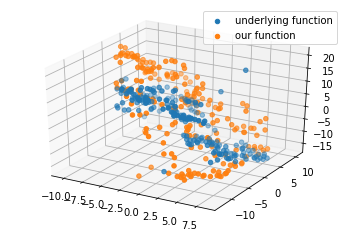

In [ ]:
plot_3d(x_transform, y_true_transform, y_pred_transform)

Epoch 0, loss 5.818032083101175
(200, 4)
Epoch 1, loss 4.058313866571592
(200, 4)
Epoch 2, loss 2.902706101251024
(200, 4)
Epoch 3, loss 2.135946811637215
(200, 4)
Epoch 4, loss 1.6409960876663967
(200, 4)
Epoch 5, loss 1.3403534519359437
(200, 4)
Epoch 6, loss 1.16644432263373
(200, 4)
Epoch 7, loss 1.0646668981733074
(200, 4)
Epoch 8, loss 0.999511421696509
(200, 4)
Epoch 9, loss 0.9510456202688582
(200, 4)
(200, 2) (200, 1) (200, 1)


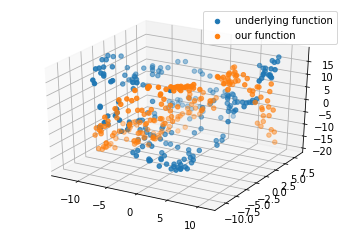

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=10)
plot_3d(TSNE(n_components=2).fit_transform(x), TSNE(n_components=1).fit_transform(y_true), TSNE(n_components=1).fit_transform(model(x)))

# **b1) pytorch without auto differentiation**

In [ ]:
import torch
from typing import Callable
from sklearn.manifold import TSNE
shape = (200,3,)
x_py_tensor = torch.rand(shape)
x_py_tensor

tensor([[0.2477, 0.7610, 0.2666],
        [0.4562, 0.2127, 0.2157],
        [0.0689, 0.4980, 0.3158],
        [0.0229, 0.3539, 0.6207],
        [0.5089, 0.4759, 0.1370],
        [0.4796, 0.1550, 0.5780],
        [0.5414, 0.9561, 0.8271],
        [0.0496, 0.9505, 0.0212],
        [0.8710, 0.6542, 0.3945],
        [0.1237, 0.1703, 0.3834],
        [0.1814, 0.3883, 0.7068],
        [0.8462, 0.2872, 0.7729],
        [0.5634, 0.5360, 0.7835],
        [0.2605, 0.1320, 0.5357],
        [0.4268, 0.4244, 0.5545],
        [0.4685, 0.4410, 0.3152],
        [0.1648, 0.3928, 0.5995],
        [0.7762, 0.8871, 0.7838],
        [0.1427, 0.4507, 0.6277],
        [0.8320, 0.4759, 0.9159],
        [0.9543, 0.7405, 0.0075],
        [0.9521, 0.4159, 0.4346],
        [0.1237, 0.2977, 0.1584],
        [0.9512, 0.9752, 0.6355],
        [0.5074, 0.7655, 0.0120],
        [0.4678, 0.8006, 0.8063],
        [0.0931, 0.6275, 0.6186],
        [0.2597, 0.0030, 0.8924],
        [0.0479, 0.5395, 0.4443],
        [0.883

In [ ]:
#f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3z^2+1 )
weights_true_py=torch.tensor([[3,2,1],[1,2,3]]).T
bias_true_py = torch.tensor([-1,1])
print(x_py_tensor.shape,weights_true_py.shape)
y_true_tensor=((x_py_tensor **2 ) @ weights_true_py.float())+bias_true_py
print(y_true_tensor.shape)
y_true_tensor

torch.Size([200, 3]) torch.Size([3, 2])
torch.Size([200, 2])


tensor([[ 4.1353e-01,  2.4329e+00],
        [-2.3862e-01,  1.4382e+00],
        [-3.9003e-01,  1.7999e+00],
        [-3.6269e-01,  2.4067e+00],
        [ 2.4868e-01,  1.7683e+00],
        [ 7.2180e-02,  2.2802e+00],
        [ 2.3917e+00,  5.1736e+00],
        [ 8.1464e-01,  2.8106e+00],
        [ 2.2871e+00,  3.0813e+00],
        [-7.4907e-01,  1.5143e+00],
        [-1.0020e-01,  2.8331e+00],
        [ 1.9107e+00,  3.6731e+00],
        [ 1.1407e+00,  3.7337e+00],
        [-4.7458e-01,  1.9636e+00],
        [ 2.1417e-01,  2.4649e+00],
        [ 1.4687e-01,  1.9065e+00],
        [-2.5062e-01,  2.4139e+00],
        [ 2.9957e+00,  5.0196e+00],
        [-1.3879e-01,  2.6084e+00],
        [ 2.3687e+00,  4.6620e+00],
        [ 2.8289e+00,  3.0075e+00],
        [ 2.2542e+00,  2.8191e+00],
        [-7.5173e-01,  1.2678e+00],
        [ 4.0203e+00,  5.0185e+00],
        [ 9.4432e-01,  2.4297e+00],
        [ 1.5884e+00,  4.4510e+00],
        [ 1.9630e-01,  2.9443e+00],
        [-1.2589e-03,  3.456

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE_tensor:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean().float()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = (2. * (self.y_pred - self.y_true) / n).float()
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear_tensor:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = torch.rand(input_dim,num_hidden) * torch.sqrt(torch.tensor(2. / input_dim))
    self.bias = torch.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = (x @ self.weights.float() + self.bias).float()
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T.float()
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights.float() - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient



class Relu_torch:
    def __call__(self, input_):
        self.input_ = input_
        self.output = torch.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient



class Model_tensor:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear_tensor(input_dim, 4)
    self.relu = Relu_torch()
    self.relu2 = Relu_torch()
    self.linear2 = Linear_tensor(4, 3)
    self.linear3 = Linear_tensor(3,2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2=self.relu2(l2)
    l3=self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    #print('Model backward', linear3_gradient.shape, relu2_gradient.shape, linear2_gradient.shape ,relu1_gradient.shape ,linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)




def fit_tensor(x: torch.tensor, y: torch.tensor, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [ ]:
loss_tensor = MSE_tensor()
model_tensor = Model_tensor(3, 2)
fit_tensor(x_py_tensor, y_true_tensor, model_tensor, loss_tensor, 0.1,10)

Epoch 0, loss 2.1795382499694824
Epoch 1, loss 4.053771495819092
Epoch 2, loss 6.481931209564209
Epoch 3, loss 4.568805694580078
Epoch 4, loss 3.3444061279296875
Epoch 5, loss 2.5607898235321045
Epoch 6, loss 2.0592758655548096
Epoch 7, loss 1.7383065223693848
Epoch 8, loss 1.5328863859176636
Epoch 9, loss 1.4014172554016113


(200, 2) (200, 1) (200, 1)


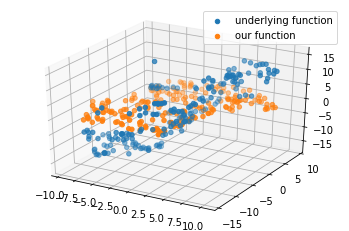

In [ ]:
plot_3d(TSNE(n_components=2).fit_transform(x_py_tensor), TSNE(n_components=1).fit_transform(y_true_tensor), TSNE(n_components=1).fit_transform(model_tensor(x_py_tensor)))

In [ ]:
print(type(model_tensor(x_py_tensor)))

<class 'torch.Tensor'>


# **b2 pytorch with auto differentiation**

In [ ]:
import torch
from typing import Callable
from sklearn.manifold import TSNE
shape = (200,3,)
x_py_tensor2 = torch.rand(shape,dtype=float, requires_grad=True)

tensor([[8.5517e-01, 1.6704e-01, 9.3488e-01],
        [8.3706e-01, 7.3156e-01, 2.9596e-01],
        [1.0065e-01, 4.0522e-01, 1.1227e-01],
        [6.6803e-01, 7.2811e-01, 9.8434e-01],
        [4.4756e-01, 4.5211e-01, 8.5012e-01],
        [8.3803e-01, 6.1831e-01, 7.2199e-01],
        [7.5940e-01, 7.6430e-01, 6.3011e-01],
        [6.5991e-01, 1.7091e-01, 6.9078e-01],
        [3.7848e-01, 5.9372e-03, 3.1130e-01],
        [8.3022e-02, 6.5261e-01, 1.2121e-01],
        [5.0808e-01, 7.7156e-01, 8.1272e-01],
        [1.3785e-01, 4.5332e-01, 8.4162e-01],
        [8.8603e-01, 6.4322e-01, 3.6391e-01],
        [8.2354e-02, 5.1832e-01, 6.2376e-01],
        [6.3314e-01, 3.6293e-01, 2.4542e-02],
        [3.7926e-01, 8.1489e-01, 7.6234e-01],
        [1.6054e-01, 9.8020e-01, 1.3026e-01],
        [4.2534e-01, 7.7207e-01, 7.1385e-01],
        [2.0373e-01, 5.8117e-01, 8.9347e-01],
        [2.6821e-01, 8.2444e-01, 7.7296e-01],
        [8.8697e-02, 4.4107e-01, 4.2347e-01],
        [9.1592e-02, 2.0588e-01, 9

In [ ]:
#f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3z^2+1 )
weights_true_py2=torch.tensor([[3,2,1],[1,2,3]],dtype=float).T
bias_true_py2 = torch.tensor([-1,1],dtype=float)
print(x_py_tensor2.shape,weights_true_py2.shape)
y_true_tensor2=((x_py_tensor2 **2 ) @ weights_true_py2)+bias_true_py2
print(y_true_tensor2.shape)

torch.Size([200, 3]) torch.Size([3, 2])
torch.Size([200, 2])


tensor([[ 2.1238e+00,  4.4091e+00],
        [ 2.2599e+00,  3.0338e+00],
        [-6.2860e-01,  1.3764e+00],
        [ 2.3680e+00,  5.4133e+00],
        [ 7.3245e-01,  3.7772e+00],
        [ 2.3927e+00,  4.0307e+00],
        [ 2.2954e+00,  3.9361e+00],
        [ 8.4204e-01,  2.9254e+00],
        [-4.7328e-01,  1.4340e+00],
        [-1.1283e-01,  1.9028e+00],
        [ 1.6256e+00,  4.4303e+00],
        [ 1.7634e-01,  3.5550e+00],
        [ 2.3150e+00,  3.0098e+00],
        [-5.3268e-02,  2.7113e+00],
        [ 4.6663e-01,  1.6661e+00],
        [ 1.3408e+00,  4.2154e+00],
        [ 1.0159e+00,  2.9982e+00],
        [ 1.2445e+00,  3.9018e+00],
        [ 5.9832e-01,  4.1119e+00],
        [ 1.1727e+00,  4.2237e+00],
        [-4.0798e-01,  1.9349e+00],
        [-4.8098e-02,  3.6190e+00],
        [ 6.2356e-01,  2.4143e+00],
        [ 2.2461e+00,  3.6156e+00],
        [-1.9245e-01,  1.8611e+00],
        [-5.4203e-01,  1.4498e+00],
        [ 1.8241e+00,  4.0115e+00],
        [ 1.7539e+00,  3.451

In [ ]:
from torch.autograd import Variable
def fit(x_py,y_true_py,num_epochs:int,lr:int):
  w1 = Variable(torch.rand((3,4),dtype=float) * torch.sqrt(torch.tensor(2. / 3)),requires_grad=True)
  b1 = torch.zeros(4,dtype=float,requires_grad=True)
  w2 = torch.rand((4,3),dtype=float,requires_grad=True) * torch.sqrt(torch.tensor(2. / 4))
  b2 = torch.zeros(3,dtype=float,requires_grad=True)
  w3 = Variable(torch.rand((3,2),dtype=float) * torch.sqrt(torch.tensor(2. / 3)),requires_grad=True)
  b3 = Variable(torch.zeros(2,dtype=float),requires_grad=True)
  relu1=Relu_tensor2()
  relu2=Relu_tensor2()
  for epoch in range(num_epochs):
    z1=x_py@w1+b1
    r1=relu1(z1)
    z2=r1@w2+b2
    r2=relu2(z2)
    z3=r2@w3+b3
    y_pred_py=z3
    loss=((y_pred_py - y_true_py) ** 2).mean()
    print(f'Epoch {epoch}, loss {loss}') 
    z3.retain_grad()
    w3.retain_grad()
    b3.retain_grad()
    z2.retain_grad()
    w2.retain_grad()
    b2.retain_grad()
    z1.retain_grad()
    w1.retain_grad()
    b1.retain_grad() 
    loss.backward(retain_graph=True)
    loss_gradient=z3.grad
    l3_gradient=loss_gradient @ torch.transpose(w3,0,1)
    r_gradient2=z2.grad * l3_gradient
    l2_gradient=r_gradient2@torch.transpose(w2,0,1)
    r_gradient1=z1.grad*l2_gradient
    l1_gradient=r_gradient1@torch.transpose(w1,0,1)
    w1 = w1 - lr * w1.grad
    b1 = b1 - lr *b1.grad
    w2 = w2 - lr * w2.grad
    b2 = b2 - lr * b2.grad
    w3 = w3 - lr * w3.grad
    b3 = b3 - lr * b3.grad
    #print(y_pred_py)
  return y_pred_py
    



In [ ]:
y_pred_py=fit(x_py_tensor2,y_true_tensor2,40,0.01)

Epoch 0, loss 1.2620618781795805
Epoch 1, loss 1.1326820643547768
Epoch 2, loss 1.022883746297239
Epoch 3, loss 0.9297586381131907
Epoch 4, loss 0.8509462795360012
Epoch 5, loss 0.7844435843067541
Epoch 6, loss 0.7285071578178601
Epoch 7, loss 0.6816033014204157
Epoch 8, loss 0.6423812125306734
Epoch 9, loss 0.6096563173258307
Epoch 10, loss 0.5823971548827184
Epoch 11, loss 0.5597128736680999
Epoch 12, loss 0.5408403576633303
Epoch 13, loss 0.5251309559533679
Epoch 14, loss 0.5120371731228335
Epoch 15, loss 0.5010997555016988
Epoch 16, loss 0.49193554276806833
Epoch 17, loss 0.4842263388936553
Epoch 18, loss 0.4777089395331286
Epoch 19, loss 0.47216635616008873
Epoch 20, loss 0.4674202066975169
Epoch 21, loss 0.4633241965747637
Epoch 22, loss 0.4597585884486
Epoch 23, loss 0.45662554799068217
Epoch 24, loss 0.45384525243310814
Epoch 25, loss 0.45135265419385673
Epoch 26, loss 0.44909480108056954
Epoch 27, loss 0.44702862535698473
Epoch 28, loss 0.4451191250865429
Epoch 29, loss 0.4433

In [ ]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [ ]:
print(type(y_pred_py))
print(y_pred_py.shape)

<class 'torch.Tensor'>
torch.Size([200, 2])


(200, 2) (200, 1) (200, 1)


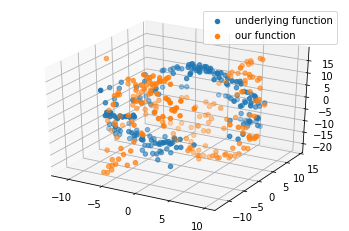

In [ ]:
plot_3d(TSNE(n_components=2).fit_transform(x_py_tensor2.detach()), TSNE(n_components=1).fit_transform(y_true_tensor2.detach()), TSNE(n_components=1).fit_transform(y_pred_py.detach()))

# **b3) pytorch with primitives**

In [ ]:
import torch
from typing import Callable
from sklearn.manifold import TSNE
shape = (200,3,)
x_py_tensor3 = torch.rand(shape).float()

In [ ]:
#f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3z^2+1 )
weights_true_py3=(torch.tensor([[3,2,1],[1,2,3]]).T).float()
bias_true_py3 = (torch.tensor([-1,1])).float()
print(x_py_tensor3.shape,weights_true_py3.shape)
y_true_tensor3=(((x_py_tensor3 **2 ) @ weights_true_py3)+bias_true_py3)
print(y_true_tensor3.shape)

torch.Size([200, 3]) torch.Size([3, 2])
torch.Size([200, 2])


In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, 4)
    self.relu1 = nn.ReLU()
    self.linear2=nn.Linear(4,3)
    self.relu2=nn.ReLU()
    self.linear3 = nn.Linear(3, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3= self.linear3(r2)
    return l3


def torch_fit(x: torch.tensor, y: torch.tensor, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x)
    loss_value = loss(y_pred_tensor, y)
    print(f'Epoch {epoch}, loss {loss_value.detach().numpy()}')
    loss_value.backward()
    optimizer.step()

In [ ]:
loss3 = nn.MSELoss()
model3 = TorchModel(3, 2)
torch_fit(x_py_tensor3, y_true_tensor3, model=model3, loss=loss3, lr=0.1, num_epochs=40)

Epoch 0, loss 6.2864909172058105
Epoch 1, loss 5.179698467254639
Epoch 2, loss 4.387416362762451
Epoch 3, loss 3.744736671447754
Epoch 4, loss 3.216744899749756
Epoch 5, loss 2.779721736907959
Epoch 6, loss 2.4167003631591797
Epoch 7, loss 2.115788459777832
Epoch 8, loss 1.8687453269958496
Epoch 9, loss 1.6698672771453857
Epoch 10, loss 1.5144332647323608
Epoch 11, loss 1.3978689908981323
Epoch 12, loss 1.31439208984375
Epoch 13, loss 1.2578649520874023
Epoch 14, loss 1.2212631702423096
Epoch 15, loss 1.1981709003448486
Epoch 16, loss 1.183543086051941
Epoch 17, loss 1.1740410327911377
Epoch 18, loss 1.167414665222168
Epoch 19, loss 1.1622314453125
Epoch 20, loss 1.1579067707061768
Epoch 21, loss 1.1538605690002441
Epoch 22, loss 1.149870753288269
Epoch 23, loss 1.1457855701446533
Epoch 24, loss 1.141573190689087
Epoch 25, loss 1.1372560262680054
Epoch 26, loss 1.1328036785125732
Epoch 27, loss 1.128127932548523
Epoch 28, loss 1.122968316078186
Epoch 29, loss 1.1176658868789673
Epoch 3

In [ ]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

(200, 2) (200, 1) (200, 1)


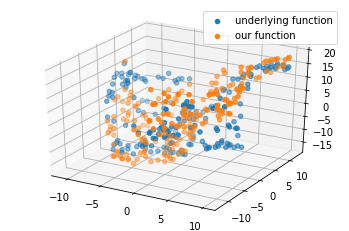

In [ ]:
plot_3d(TSNE(n_components=2).fit_transform(x_py_tensor3.detach()), TSNE(n_components=1).fit_transform(y_true_tensor3.detach()), TSNE(n_components=1).fit_transform(model3(x_py_tensor3).detach()))